In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('../data/Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [10]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

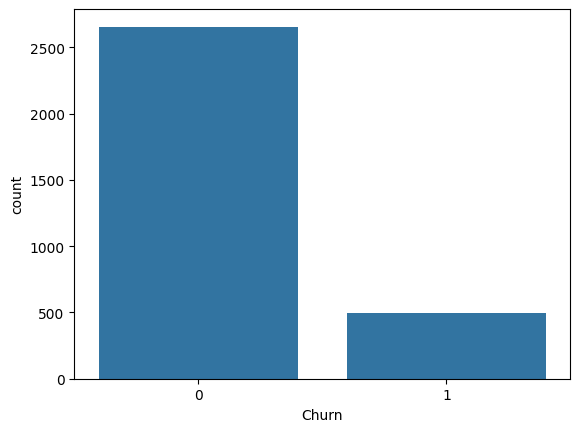

In [11]:
sns.barplot(df['Churn'].value_counts())

In [12]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
x = df.drop('Churn',axis=1)
y = df['Churn']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

model = LogisticRegression() 
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {round(acc*100,2)}')

print('classification_report')
print(classification_report(y_test,y_pred))

Test Accuracy is 84.13
classification_report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       531
           1       0.49      0.17      0.25        99

    accuracy                           0.84       630
   macro avg       0.67      0.57      0.58       630
weighted avg       0.80      0.84      0.81       630



recall is very bad for class 1 because of imbalance dataset

In [16]:
# for treat Imbalance data
! pip install imblearn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

x_train_rus,y_train_rus = rus.fit_resample(x_train,y_train)

y_train_rus.value_counts()

Churn
0    396
1    396
Name: count, dtype: int64

In [21]:
model = LogisticRegression() 
model.fit(x_train_rus,y_train_rus)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {round(acc*100,2)}')

print('classification_report')
print(classification_report(y_test,y_pred))

Test Accuracy is 73.02
classification_report
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       531
           1       0.35      0.81      0.48        99

    accuracy                           0.73       630
   macro avg       0.65      0.76      0.65       630
weighted avg       0.86      0.73      0.76       630



In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

In [22]:
model = LogisticRegression() 
model.fit(x_train_smote,y_train_smote)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {round(acc*100,2)}')

print('classification_report')
print(classification_report(y_test,y_pred))

Test Accuracy is 76.83
classification_report
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       531
           1       0.39      0.84      0.53        99

    accuracy                           0.77       630
   macro avg       0.68      0.80      0.69       630
weighted avg       0.87      0.77      0.80       630



In [23]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
x_train_tomek, y_train_tomek = tomek.fit_resample(x_train,y_train)
y_train_tomek.value_counts()

Churn
0    2091
1    2091
Name: count, dtype: int64

In [24]:
model = LogisticRegression() 
model.fit(x_train_tomek,y_train_tomek)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print(f'Test Accuracy is {round(acc*100,2)}')

print('classification_report')
print(classification_report(y_test,y_pred))

Test Accuracy is 76.83
classification_report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       531
           1       0.39      0.86      0.54        99

    accuracy                           0.77       630
   macro avg       0.68      0.80      0.69       630
weighted avg       0.88      0.77      0.80       630

